# **CARGA DE TRAIN Y TEST**

In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train=pd.read_excel('01-x_train-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
x_test=pd.read_excel('01-x_test-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_train=pd.read_excel('01-y_train-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)
y_test=pd.read_excel('01-y_test-IEMOCAP-SINRUIDOEXTREMO-dato_audioopensmile.xlsx',index_col=0)


# **SELECCION DE CARACTERISTICAS**

In [3]:
#prueba 03 Eliminando ['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz']
x_train=x_train.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)
x_test=x_test.drop(['slope500-1500_sma3','mfcc3_sma3','logRelF0-H1-A3_sma3nz'] , axis =1)

# **NORMALIZACION DE CARACTERISTICAS**

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_std = sc.fit_transform(x_train)
#para trasnformar los datos de testing
x_test_std = sc.transform(x_test)

In [8]:
x_train_std

array([[ 6.50118113e-01,  8.95830105e-01, -1.46026471e+00, ...,
         1.11785180e+00,  2.05521493e-01,  1.12752220e+00],
       [-3.04089401e-01, -7.31279049e-01,  6.25497194e-01, ...,
         6.85945071e-02, -1.35572244e+00,  1.79881913e-01],
       [ 4.67831679e-04,  1.26385821e-01, -1.87427789e-01, ...,
         9.34322875e-01, -2.43267326e+00,  9.63954344e-01],
       ...,
       [ 6.15616050e-01,  1.97514446e-02,  1.35494861e-01, ...,
         1.51654330e-01, -1.65871303e+00,  3.33160666e-01],
       [-6.86591321e-01, -2.04889305e+00,  1.15876413e+00, ...,
        -1.76436924e+00, -4.08637350e-01,  1.22031711e+00],
       [-1.17279284e-01,  3.18274452e-01, -8.96231365e-01, ...,
        -3.95575222e-01, -1.97013625e-01,  7.55047298e-01]])

# **MODELO DE MARCHINE LEARNING**

In [9]:

import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential # Arquitectura de la red
from keras.layers import Dense      # Capas de las redes neuronales
#from keras.layers import Dropout    # Regularizacion / Evita sobreajuste

clf = Sequential()
clf.add(Dense(512, activation='relu', input_dim=x_train.shape[1]))
clf.add(Dense(128, activation='relu'))
clf.add(Dense(32, activation='relu'))
clf.add(Dense(4, activation='softmax'))
# Compile the model
clf.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
clf.summary()






Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               11776     
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 32)                4128      
                                                                 
 dense_3 (Dense)             (None, 4)                 132       
                                                                 
Total params: 81,700
Trainable params: 81,700
Non-trainable params: 0
_________________________________________________________________


In [10]:
# one hot encode outputs

y_t_Categorical = to_categorical(y_train)
#y_test = to_categorical(y_test)

clf.fit(x_train_std, y_t_Categorical , epochs=800)#1000
y_predict = clf.predict(x_test_std)

y_predict=np.argmax(y_predict, axis=1)
y_predict

#epochs
#680 R
#800 I
#1000 70
#1000 67
#1250 69
#1300 66
#995 68

Epoch 1/800
57/57 [==============================] - 1s 3ms/step - loss: 0.9662 - accuracy: 0.5954
Epoch 2/800
57/57 [==============================] - 0s 3ms/step - loss: 0.8490 - accuracy: 0.6491
Epoch 3/800
57/57 [==============================] - 0s 3ms/step - loss: 0.8080 - accuracy: 0.6678
Epoch 4/800
57/57 [==============================] - 0s 3ms/step - loss: 0.7686 - accuracy: 0.6787
Epoch 5/800
57/57 [==============================] - 0s 3ms/step - loss: 0.7377 - accuracy: 0.6902
Epoch 6/800
57/57 [==============================] - 0s 3ms/step - loss: 0.7119 - accuracy: 0.7007
Epoch 7/800
57/57 [==============================] - 0s 3ms/step - loss: 0.6924 - accuracy: 0.7089
Epoch 8/800
57/57 [==============================] - 0s 3ms/step - loss: 0.6518 - accuracy: 0.7308
Epoch 9/800
57/57 [==============================] - 0s 3ms/step - loss: 0.6581 - accuracy: 0.7270
Epoch 10/800
57/57 [==============================] - 0s 3ms/step - loss: 0.6289 - accuracy: 0.7396
Epoch 11/

array([0, 2, 3, 2, 2, 3, 2, 3, 2, 0, 3, 3, 2, 3, 0, 3, 2, 0, 3, 1, 2, 2,
       2, 3, 3, 0, 2, 2, 3, 2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 0, 3, 1,
       3, 3, 2, 3, 3, 3, 1, 1, 1, 2, 1, 2, 3, 2, 2, 3, 2, 3, 2, 2, 2, 2,
       1, 3, 2, 3, 2, 3, 2, 3, 2, 1, 1, 2, 2, 1, 3, 2, 3, 2, 0, 2, 2, 2,
       3, 3, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 3,
       2, 2, 3, 1, 1, 2, 3, 3, 3, 2, 2, 0, 3, 2, 3, 2, 2, 2, 0, 3, 2, 1,
       2, 2, 2, 2, 3, 2, 0, 2, 3, 2, 1, 2, 3, 3, 0, 2, 2, 2, 2, 3, 2, 2,
       1, 2, 3, 1, 1, 3, 2, 2, 0, 2, 3, 1, 2, 2, 3, 2, 2, 2, 2, 2, 2, 1,
       2, 3, 1, 1, 3, 3, 0, 0, 3, 2, 0, 0, 3, 3, 3, 0, 2, 3, 2, 1, 0, 2,
       2, 2, 0, 0, 3, 2, 1, 2, 3, 2, 2, 2, 1, 3, 1, 1, 3, 3, 3, 3, 2, 2,
       0, 2, 2, 2, 3, 2, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 2, 0, 0,
       2, 3, 2, 1, 3, 0, 0, 1, 2, 2, 3, 3, 2, 2, 2, 2, 0, 2, 1, 2, 2, 3,
       0, 2, 1, 3, 2, 3, 1, 2, 3, 3, 0, 3, 2, 3, 3, 2, 1, 2, 3, 3, 2, 3,
       0, 2, 3, 3, 2, 2, 2, 2, 0, 3, 2, 3, 2, 2, 2,

# **EVALUACION**

In [11]:
from sklearn.metrics import classification_report, confusion_matrix
print (classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.52      0.62      0.57        53
           1       0.41      0.43      0.42        56
           2       0.73      0.63      0.68       238
           3       0.62      0.73      0.67       109

    accuracy                           0.63       456
   macro avg       0.57      0.60      0.58       456
weighted avg       0.64      0.63      0.63       456



In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta función imprime y marca la matriz de confusión.
    Se puede aplicar Normalización seteando la variable `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Matriz de confusión, sin normalización')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Etiqueta True')
    plt.xlabel('Etiqueta predecida')

              precision    recall  f1-score   support

           0       0.52      0.62      0.57        53
           1       0.41      0.43      0.42        56
           2       0.73      0.63      0.68       238
           3       0.62      0.73      0.67       109

    accuracy                           0.63       456
   macro avg       0.57      0.60      0.58       456
weighted avg       0.64      0.63      0.63       456

Matriz de confusión, sin normalización
[[ 33   3  13   4]
 [ 10  24  17   5]
 [ 18  30 150  40]
 [  2   1  26  80]]


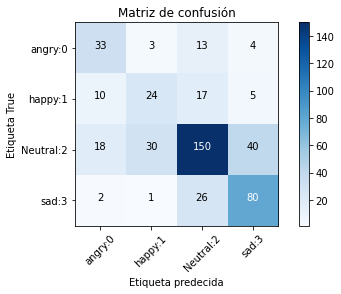

In [13]:
# Computar la matriz de confusión
cnf_matrix = confusion_matrix(y_test, y_predict, labels=[0,1,2,3])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_predict))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['angry:0','happy:1','Neutral:2','sad:3',],normalize= False,  title='Matriz de confusión')